<a href="https://colab.research.google.com/github/MirzaSaniya/New-York-Real-Estate-Analysis/blob/main/New_York_Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages to load, manipulate,plot and perform linear regression and hypothesis testing.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Loading the data set using some the dataset url and assigning it into data.

In [ ]:
data_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQKKR48uSfSS77XnyaRqws4vuGYh7dgBLZp_juzJEZNRnkQ9DiSJcl-MQ8ia5JidNYErAZMXu4Q8FbS/pub?gid=962251625&single=true&output=csv'
data=pd.read_csv(data_url)

In [ ]:
data.shape

(3974, 11)

Dropping the columns that are not useful for the analysis like country and country because the id is unique and not essential anf the dataset contains only 1 country i.e., Australia.

In [ ]:
data.drop(['id','country'],axis=1,inplace=True)

In [ ]:
data.head()

,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,NSW,BALLINA SHIRE COUNCIL,House,17.21,$50.00,Private room,4.0,4.0,3.0
4,NSW,BALLINA SHIRE COUNCIL,House,16.13,$52.00,Private room,1.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 9 columns):
state                     3781 non-null object
neighbourhood_cleansed    3974 non-null object
property_type             3974 non-null object
square_meters             3974 non-null float64
price                     3974 non-null object
room_type                 3974 non-null object
bathrooms                 3969 non-null float64
bedrooms                  3972 non-null float64
beds                      3973 non-null float64
dtypes: float64(4), object(5)
memory usage: 279.5+ KB


Here we can see that the price is object form means it is in string from so we need to convert it into float by removing the $ and , in between the price and then converting it into float.

In [ ]:
data['price'] = data['price'].map(lambda x: str(x).lstrip('$').replace(',','')).astype(float)
data.head()

,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,NSW,BALLINA SHIRE COUNCIL,House,0.00,2900.0,Entire home/apt,3.0,4.0,4.0
1,NSW,BALLINA SHIRE COUNCIL,House,1.55,28.0,Private room,1.0,1.0,1.0
2,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,141.0,Entire home/apt,1.0,1.0,1.0
3,NSW,BALLINA SHIRE COUNCIL,House,17.21,50.0,Private room,4.0,4.0,3.0
4,NSW,BALLINA SHIRE COUNCIL,House,16.13,52.0,Private room,1.0,1.0,1.0


In [ ]:
data.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,3974.000000,3974.000000,3969.000000,3972.000000,3973.000000
mean,32.708699,802.004781,1.637314,2.262840,2.982884
std,12.482715,885.335192,0.832215,1.368016,1.993749
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24.890000,200.000000,1.000000,1.000000,1.000000
50%,29.700000,509.000000,1.000000,2.000000,3.000000
75%,35.225000,1100.000000,2.000000,3.000000,4.000000
max,208.700000,11500.000000,9.000000,12.000000,18.000000


Checking for the na values.

In [ ]:
data.isna().sum()

state                     193
neighbourhood_cleansed      0
property_type               0
square_meters               0
price                       0
room_type                   0
bathrooms                   5
bedrooms                    2
beds                        1
dtype: int64

Dropping all the na values in rows and again checking for the Na values.

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isna().sum()

state                     0
neighbourhood_cleansed    0
property_type             0
square_meters             0
price                     0
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
dtype: int64

In [ ]:
data.shape

(3773, 9)

Now checking the properties of categoricla features so that we can use only the most repeated one in our dataset or we can do label encoding.

In [ ]:
data[['state','neighbourhood_cleansed','property_type','room_type']].describe()

,state,neighbourhood_cleansed,property_type,room_type
count,3773,3773,3773,3773
unique,8,5,8,3
top,NSW,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,3602,2456,2331,3025


Checking for the outliers and removing all the outliers and filtered the dataset with only most repeated categorical features and assigning it to a new variable.

In [ ]:

q_low = data["price"].quantile(0.01)
q_hi  = data["price"].quantile(0.99)
# removing the outliers for price
data_trimmed = data[(data["price"] < q_hi) & (data["price"] > q_low)]
# based on categorical values choosing only most repeated features.
data_filtered = data_trimmed.loc[(data_trimmed['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL']))]
data_filtered = data_filtered.loc[(data_filtered['property_type'].isin(['House']))]
data_filtered = data_filtered.loc[(data_filtered['room_type'] == 'Entire home/apt')]
data_filtered=data_filtered.loc[(data_filtered['state']=='NSW')]

In [ ]:
data_filtered.head()

,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
453,NSW,BYRON SHIRE COUNCIL,House,4.00,1550.0,Entire home/apt,2.0,3.0,3.0
580,NSW,BYRON SHIRE COUNCIL,House,19.10,85.0,Entire home/apt,1.0,0.0,1.0
586,NSW,BYRON SHIRE COUNCIL,House,18.22,79.0,Entire home/apt,1.0,0.0,1.0
594,NSW,BYRON SHIRE COUNCIL,House,20.20,100.0,Entire home/apt,1.5,3.0,4.0
639,NSW,BYRON SHIRE COUNCIL,House,20.61,115.0,Entire home/apt,1.0,2.0,2.0


**EXploratory Data Analysis**

WE can clearly see the hike in prices with respect to bathrooms it means that if we increase the number of bathrooms then price also increases technically both price and bathrooms are directly proportional to each other.

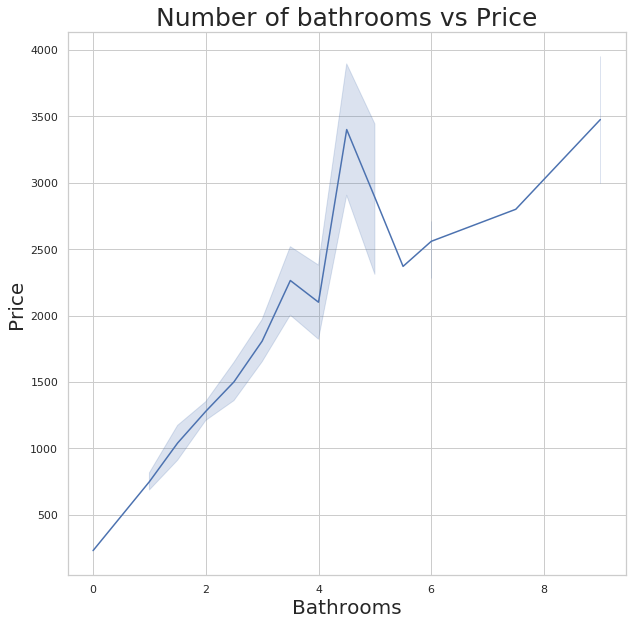

In [ ]:
# Importing rcparams to set the size of the figure
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,10

sns.lineplot(x='bathrooms',y='price',data=data_filtered)
plt.xlabel('Bathrooms',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Number of bathrooms vs Price',fontsize=25)
plt.show()

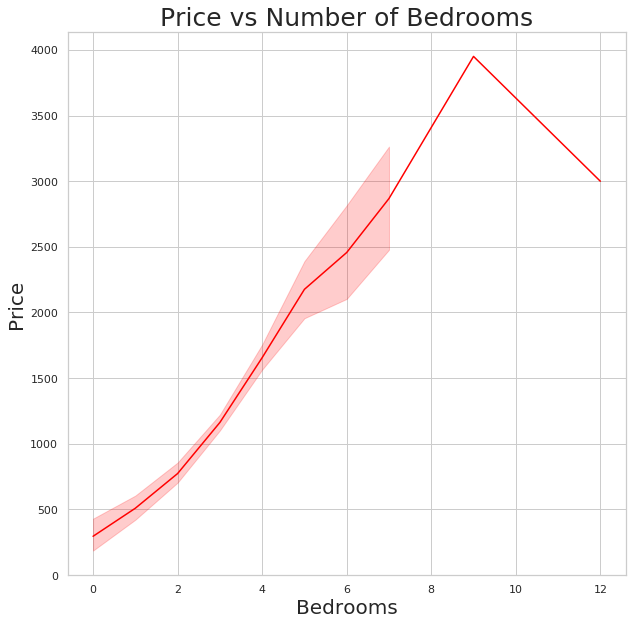

In [ ]:
sns.lineplot(x='bedrooms',y='price',data=data_filtered,color='red')
plt.xlabel('Bedrooms',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Price vs Number of Bedrooms',fontsize=25)
plt.show()

Here again we can clearly say that if we need more bedrooms in our property then we need to pay more because with increased number of bedrroms there is increase in the area which ultimately leads to price hike.

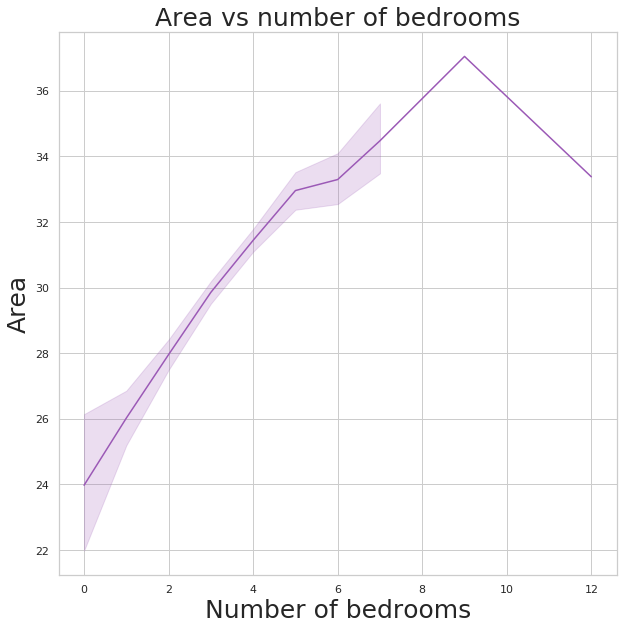

In [ ]:
sns.lineplot(x='bedrooms',y='square_meters',data=data_filtered,color="#9b59b6")
plt.ylabel('Area',fontsize=25)
plt.xlabel('Number of bedrooms',fontsize=25)
plt.title('Area vs number of bedrooms',fontsize=25)
#plt.xlim([0,15])
plt.show()

Coming to the area for number of bedrooms in the house, as expected the more the number of bedrooms the larger the area is so this doesn't change our intution that more number of bedrooms larger the area is.

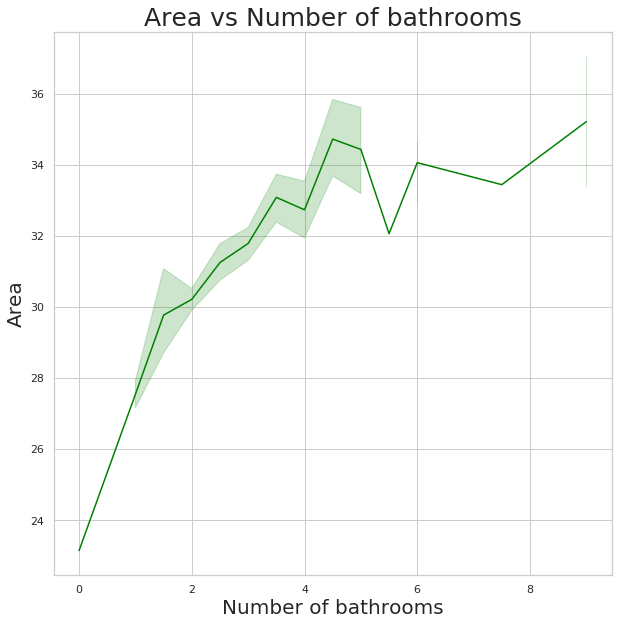

In [ ]:
sns.lineplot(x='bathrooms',y='square_meters',data=data_filtered,color='green')
plt.ylabel('Area',fontsize=20)
plt.xlabel('Number of bathrooms',fontsize=20)
plt.title('Area vs Number of bathrooms',fontsize=25)
plt.show()

Same as bedrooms, respective area for property increases along with increase but by some small margin and even it drops between 4 and 8 bathrooms because the larger the numeber of bathrooms they must have reduced the size occupied by each bathroom so the overall area decreased or remained same.

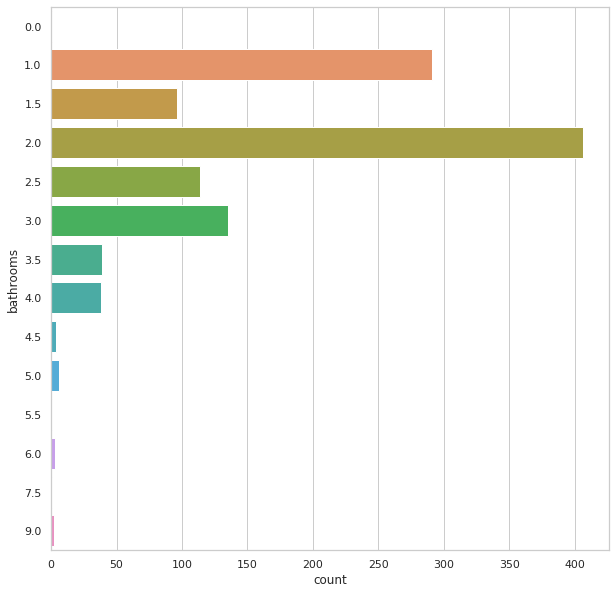

In [ ]:
sns.countplot(y='bathrooms',data=data_filtered)
plt.show()

Above plot is the countplot for the number of bathrooms in the dataset and we can see that most of the properties have 2 bathrooms and the least of them have either 6 or 7 bathrooms.

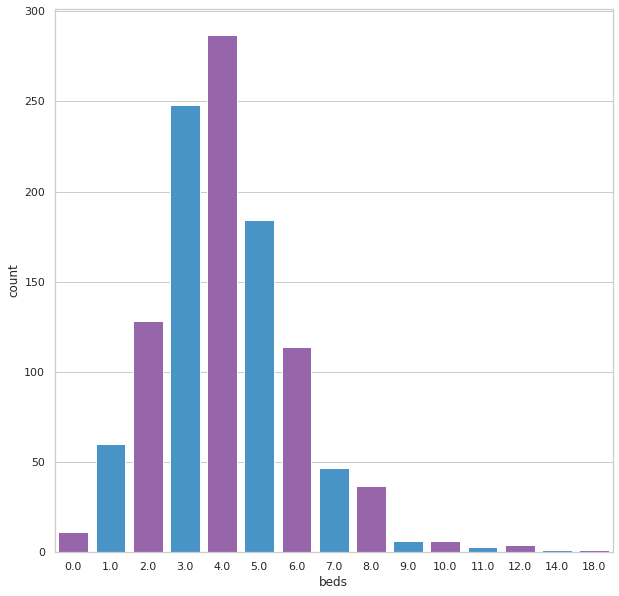

In [ ]:
sns.countplot(x='beds',data=data_filtered,palette=["#9b59b6", "#3498db"])
plt.show()

Above countplot shows the number of beds in the dataset and it follows a normal districution. Most of the properties have 4 beds.

The scatter plot for dependent variable price and the independent variable square metres is given below and it from the plot we can say that it shows positive correlation which means that with the increase in square metres there is increase in price of the property.

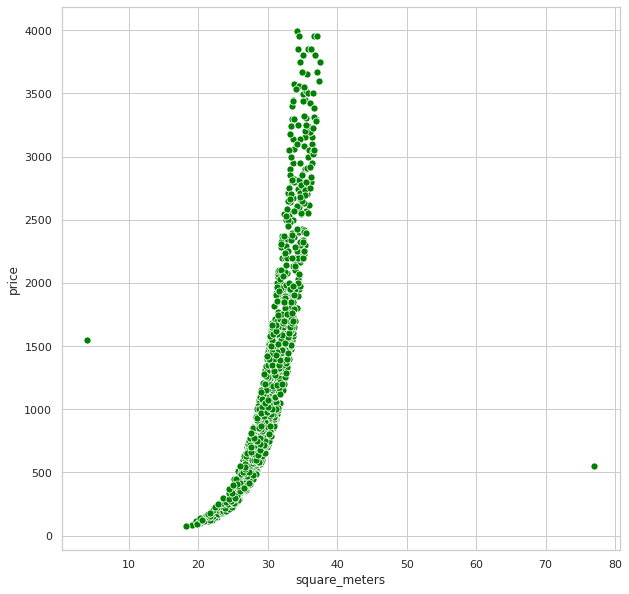

In [ ]:
sns.scatterplot(x='square_meters',y='price',data=data_filtered,s=50,color='green')
plt.show()

Below regular plot shows the scatter plot between or dependent variable price and indepedent variable square metres and it also shows the correlation curve i.e., regression between price and square metres.

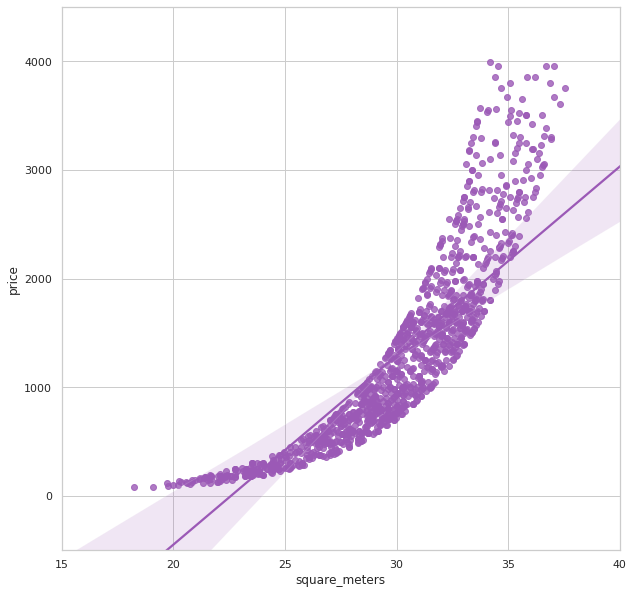

In [ ]:
sns.regplot(x='square_meters',y='price',data=data_filtered,color="#9b59b6")
plt.xlim([15,40])
plt.ylim([-500,4500])
plt.show()

**Inferences**


From the Exploratory data analysis I conclude that with the increase in the number of bedrooms and bathrooms the area increases which leads to overall increase in price but some of the features increased the number of bathrooms tough the area decreased. We can see from the last figure that as the area increase price increased exponentially but not linearly which states that there is more increase in the value which is the reason why linear model fails to predict the accurate values so we can use some higher regression models like Random Forest, Decision Tree and Xgboost to increase the accuracy of the model.

Building a linear regression model to predict the house prices with area. Initially taking independent and dependent variables and reshaping them and dividing them into training and testing parts using train_test_split from the sklearn model.

In [ ]:
# assigning independent variable to X
x_var=['square_meters']
X=data_filtered[x_var].values
# assigning dependent variable to y
y=data_filtered['price'].values
#reshaping both the X and y
X=X.reshape(len(data_filtered),len(data_filtered[x_var].columns))
y=y.reshape(len(data_filtered),1)
# dividing the dataset into traing part and testing part.
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [ ]:
# determining the length of training and testing parts for independent variables.
len(X_train),len(X_test)

(852, 285)

In [ ]:
# determining the length of training and testing parts for dependent variables.
len(y_train),len(y_test)

(852, 285)

Building the model with trained data and predicting the test values using the build model.

In [ ]:
# Building the Linear Regression model
lr=LinearRegression().fit(X_train,y_train)
# predicting the values for testing part and storing them in ypred
ypred=lr.predict(X_test)

Storing the predicted values in a dataframe and finding the linear model intercept and coefficient. Determing the Mean square error and variance score between test values and predicted values.

In [ ]:
# storing the predicted values in dataframe and assigning the name predicted values for its columns.
print((pd.DataFrame(ypred, columns={'predicted_values'}).head()))
print()
# Deteriming the intercept for our linear model
print('Intercept:', float(lr.intercept_))
# Determining the coefficients for the linear model
coeff = pd.DataFrame(lr.coef_)
coeff.columns = x_var
print(coeff)
print()
# Evaluating the mean squared error value
print("Mean Squared Error (MSE):%.3f" % mean_squared_error(y_test,ypred))
# Evaluating the Variance score
print('Variance Score (R^2):%.3f' % r2_score(y_test, ypred))

   predicted_values
0        950.169943
1        513.694830
2       2334.017307
3        994.420877
4       1467.101299

Intercept: -4738.086370567595
   square_meters
0     201.140605

Mean Squared Error (MSE):548839.481
Variance Score (R^2):0.265


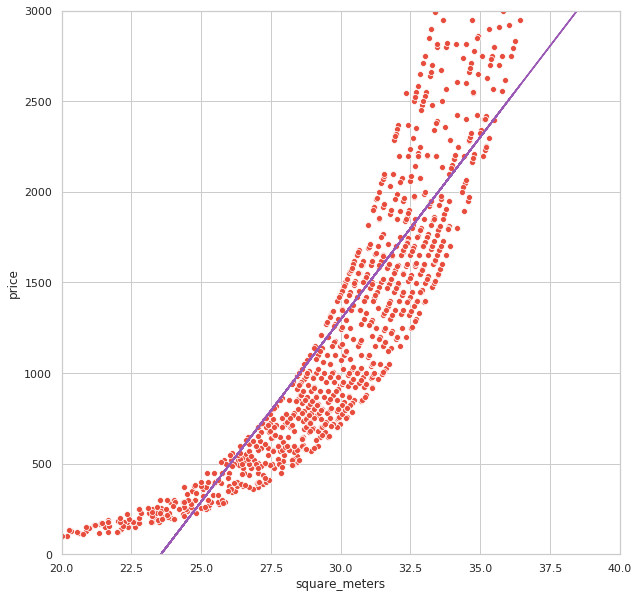

In [ ]:
# scatter plot for square metres andprice
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = data_filtered,color="#e74c3c")
# plot for the linear model build above in the scatter plot to show the relation.
plt.plot(X_test,ypred,color="#9b59b6")
plt.ylim([0,3000])
plt.xlim([20,40])
plt.show()

Now including more variables into the model so that it can increase the efficiency of our model which helps to predict values more accurately.

In [ ]:
# Involving all the additional features to imporve model accuracy
x_total=['square_meters','bathrooms','beds']
X2=data_filtered[x_total].values
y2=data_filtered['price'].values
# reshaping both the dependent variables and independent variables.
column_length=len(data_filtered[x_total].columns)
X2=X2.reshape(len(data_filtered),column_length)
y2=y2.reshape(len(data_filtered),1)



In [ ]:
# Dividing the dataset into training part and testing part
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,train_size=0.75)

In [ ]:
#determining the length of training  parts for both dependent variables and independent variables.
X_train2.shape,y_train2.shape

((852, 3), (852, 1))

In [ ]:
# determining the length of testing parts for both dependent variables and independent variables.
X_test2.shape,y_test2.shape

((285, 3), (285, 1))

Training our model with more variables and predicting the test values and storing them in new feature.

In [ ]:
# building a linear regression based on above variables
lr2=LinearRegression().fit(X_train2,y_train2)
# predicting the values and storing them in ypred2
ypred2=lr2.predict(X_test2)

Storing the predicted varibales in a dataframe and fiding the Intercepts and coefficient of our linear regression model.Here we have more than 1 coefficient because we have more than 1 independent variable. Finally measuring the Mean square error and variance score between test values and predicted values.

In [ ]:
# storing the values in a dataframe
print((pd.DataFrame(ypred2, columns={'predicted_values'}).head()))
print()
# Finding intercept for our 2 linear equation
print('Intercept for 2 linear expression is:' , float(lr2.intercept_))
# finding the coefficients for 2 linear equation
coeff_df = pd.DataFrame(lr2.coef_)
coeff_df.columns = x_total
print(coeff_df)
print('')
# evaluating the mean squared error between test values and predicted values.
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test,ypred))
# Evaluating the variance between test values and predicted values.
print('Variance Score (R^2):%.2f' % r2_score(y_test, ypred))

   predicted_values
0       2623.107220
1       1787.877841
2       1489.520365
3       1505.664134
4       1113.456888

Intercept for 2 linear expression is: -3382.8074965285423
   square_meters  bathrooms       beds
0     137.491924  226.19728  20.172042

Mean Squared Error (MSE):548839.48
Variance Score (R^2):0.26


**Hypothesis Testing**

Loading the datasets using the url and pandas dataframe.

In [ ]:
sfo_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQKKR48uSfSS77XnyaRqws4vuGYh7dgBLZp_juzJEZNRnkQ9DiSJcl-MQ8ia5JidNYErAZMXu4Q8FbS/pub?gid=1613941006&single=true&output=csv'

sfo_data=pd.read_csv(sfo_url)


In [ ]:
sfo_data.head()

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,84.715368,0
1,09/15/2019,14.789110,0
2,09/16/2019,75.946251,0
3,09/17/2019,91.027888,0
4,09/18/2019,85.113494,0


In [ ]:
sfo_data.Marketing_Campaign.value_counts()

0    74
1    29
Name: Marketing_Campaign, dtype: int64

In [ ]:
sfo_data.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,58.498358,0.281553
std,33.855404,0.451956
min,5.001135,0.000000
25%,31.470970,0.000000
50%,63.693400,0.000000
75%,84.722216,1.000000
max,136.545511,1.000000


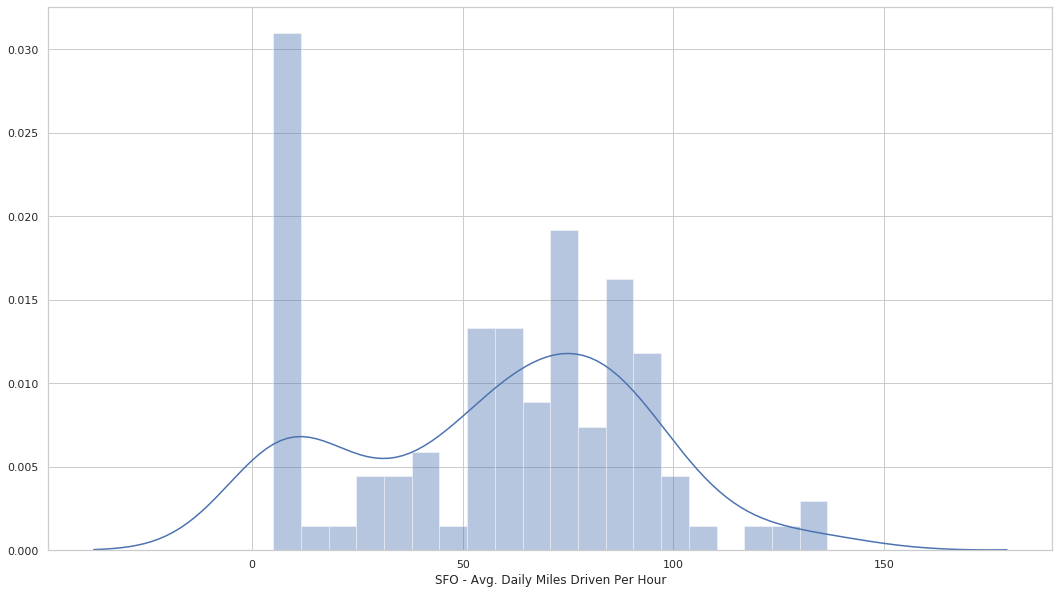

In [ ]:
plt.figure(figsize=(18,10))
sns.distplot(sfo_data['SFO - Avg. Daily Miles Driven Per Hour'],bins=20)
plt.show()

Taking 2 different variables for different marketing compaigns and plotiing them together to see the distribution using seaborn.

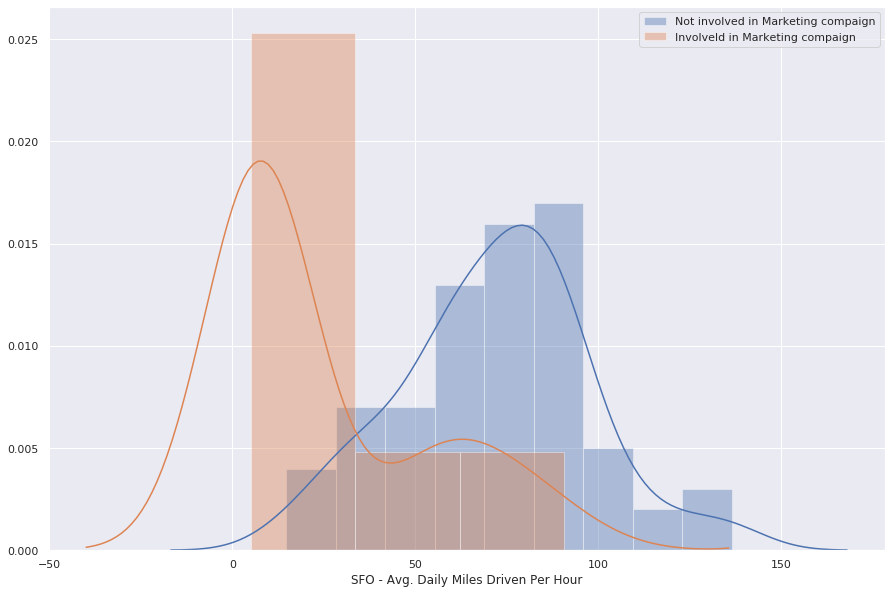

In [ ]:
# assigning the differant categories according to marketing campaign and plotting histogrtams for differant categories.
sfo_0 = sfo_data['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_data['Marketing_Campaign']==0]
sfo_1 = sfo_data['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_data['Marketing_Campaign']==1]
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
ax = sns.distplot(sfo_0, hist=True)
ax = sns.distplot(sfo_1, hist=True)
plt.legend(['Not involved in Marketing compaign','Involveld in Marketing compaign'])
plt.show()

Determing the P value and comparing it with alpha either to reject the Null hypothesis or reject the alternate Hypothesis. We can see that from the above plot both distributions and differenet and we can conclude to reject the Hypothesis means Involving in marketing compaign decreases the average miles driven per hour in San Fracisco.

In [ ]:
# importing necessary packages from numpy and scipy to measure the p value and stat value
from scipy.stats import f_oneway
from numpy.random import randn
from numpy.random import seed
# determing the stat and p value
stat,p=f_oneway(sfo_0,sfo_1)
print('statistcs=%.3f,p=%.3f' % (stat,p))
# checking the conditions to reject or approve null hypothesis based on requirements
alpha=0.05
if p>alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Differant distributions(reject H0)')

statistcs=70.670,p=0.000
Differant distributions(reject H0)


**Los angeles Data**

In [ ]:
lax_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQKKR48uSfSS77XnyaRqws4vuGYh7dgBLZp_juzJEZNRnkQ9DiSJcl-MQ8ia5JidNYErAZMXu4Q8FbS/pub?gid=79638741&single=true&output=csv'
lax_data=pd.read_csv(lax_url)

In [ ]:
lax_data.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,125.656245,0.291262
std,70.129425,0.456566
min,-80.914564,0.000000
25%,81.802007,0.000000
50%,129.495673,0.000000
75%,168.090801,1.000000
max,285.533735,1.000000


In [ ]:
lax_data.Marketing_Campaign.value_counts()

0    73
1    30
Name: Marketing_Campaign, dtype: int64

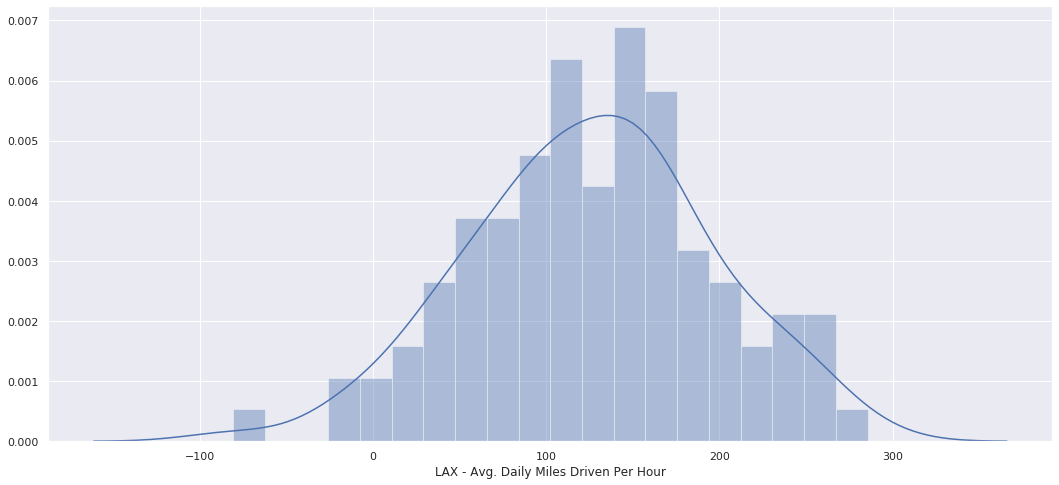

In [ ]:
plt.figure(figsize=(18,8))
sns.distplot(lax_data['LAX - Avg. Daily Miles Driven Per Hour'],bins=20)
plt.show()

Above distplot shows the distributions of average miles driven per hour in los angeles and it clearly shows that it follows a normal distribution.

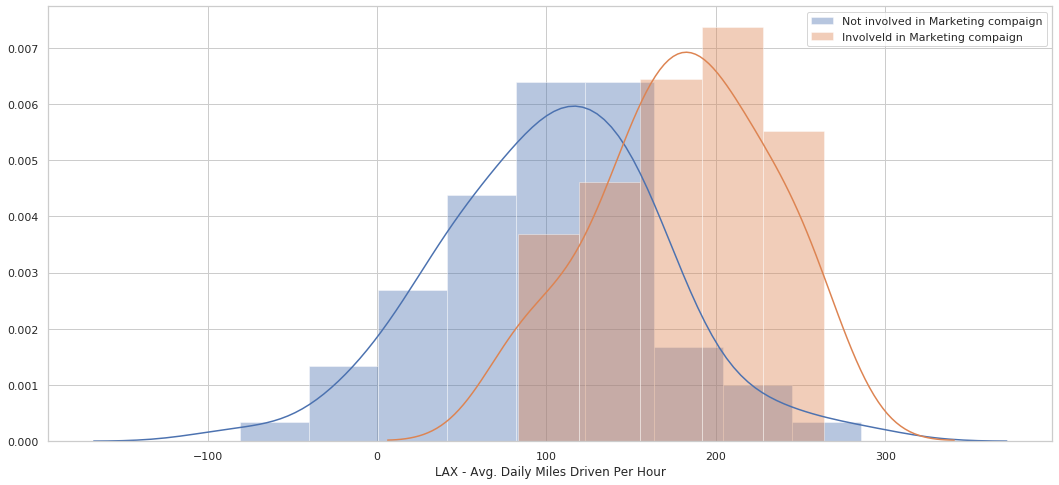

In [ ]:
lax_0 = lax_data['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_data['Marketing_Campaign']==0]
lax_1 = lax_data['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_data['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
ax = sns.distplot(lax_0, hist=True)
ax = sns.distplot(lax_1, hist=True)
plt.legend(['Not involved in Marketing compaign','Involveld in Marketing compaign'])
plt.show()

Taking two variables for different for different conditions for involving in marketing compaign or not involving in marketing compaign. From the above plot we can that the involving in marketung compaign imprives the average number of miles driven per hour so here we reject the null hypothesis.

In [ ]:
# importing necessary packages
from scipy.stats import f_oneway
from numpy.random import randn
from numpy.random import seed
# determing the p and stat values using f_oneway
stat,p=f_oneway(lax_0,lax_1)
print('statistcs=%.4f,p=%.4f' % (stat,p))
# checking the conditions to either reject or approve null hypothesis
alpha=0.05
if p>alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Differant distributions(reject H0)')

statistcs=34.4683,p=0.0000
Differant distributions(reject H0)


Marketing compaign was succesful in incresing the average miles driven per hour.

I think some other factors like increase in customers at thats particular dates, increase in number of drivers may have infulenced the study in both San francisco and Los angeles but ultimately our dataset shows there is increase in the productivty when they are involved in marketing compaign.